# Treating Skin Disease Identification as a simple 3 classes classification Task
## Choose classes.
We have choosen 3 classes with equal amount of images = 151 hence there is no class imbalance.

## Results

### Without Image augmentation
The model heavily overfitted, possible reasons are not enough data as it was working fine on binary classifcation with val-accuracy remaining under 50%

### With Image Augmentation.
The model improved substantially with val-accuracy reaching 70% with few parameter changes But still not enougb with an accuracy of 95%

### After Hyperparamter optimization and adjusting epochs 
The model improved slightly with the accuracy reaching 98% with validation accuracy reaching 77%, still model being quite overfitted.

## Further Steps
- Try this on binary segmented data images using a pre-trained model of segment anything
- Try this with Otus's segmentation
- Improve the architecture of the model this is a very prelimnary architecture.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

dataset_path = ""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
#     print(dirname)
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        dataset_path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
files_list = glob.glob("/kaggle/input/fitzpatrick/*")
files_list

['/kaggle/input/fitzpatrick/fitzPatrickCategorizer.py',
 '/kaggle/input/fitzpatrick/fitzpatrick_cleaned_annoted_data.xlsx',
 '/kaggle/input/fitzpatrick/fitzPatrickDownloader.py',
 '/kaggle/input/fitzpatrick/CategorizedFitz',
 '/kaggle/input/fitzpatrick/image.csv',
 '/kaggle/input/fitzpatrick/fitzpatrick17k.csv']

In [3]:
images = glob.glob('/kaggle/input/fitzpatrick/*/')[0]
images

'/kaggle/input/fitzpatrick/CategorizedFitz/'

In [12]:
label_151 = ['pediculosis lids', 'dermatomyositis', 'acne']


In [13]:


# Sort the list in alphanumerical order
sorted_labels = sorted(label_151)

sorted_labels

['acne', 'dermatomyositis', 'pediculosis lids']

In [15]:
#Entirely used to make_directory of working classes
working_path = "/kaggle/working/working_classes_2"
import shutil
if not(os.path.exists(working_path)):
    os.mkdir(working_path)
for label in label_151:
    new_dir = working_path + "/" + label
    shutil.copytree(images + "/" + label, new_dir)
    
workings = glob.glob(working_path + "/*/")

In [16]:
workings

['/kaggle/working/working_classes_2/dermatomyositis/',
 '/kaggle/working/working_classes_2/pediculosis lids/',
 '/kaggle/working/working_classes_2/acne/']

In [17]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

['/kaggle/input/fitzpatrick/CategorizedFitz/acne/dc9fc1c8428e390e6f790e19d24c4e4a.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/8c0eeb53db59a24675cb21b640006fd8.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/0bd2ab66f36e69352a45d5122f4aad07.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/1908406a9d82168af4c6596cf963dbcc.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/728a36e89f7599c7740a0935c8e36621.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/c01fbc5996baf26b3ba5db9c785c9436.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/d2d7fe50c09a826652c64f601a00dc9e.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/92263f85d6f3398535bdf5535d78a827.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/6372c52836107dd23cff2f8c972353ef.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/dc5783ebf370ccb672625f16d07e1512.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/acne/b50beca100950b19f754ba74b5d8dc80.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz

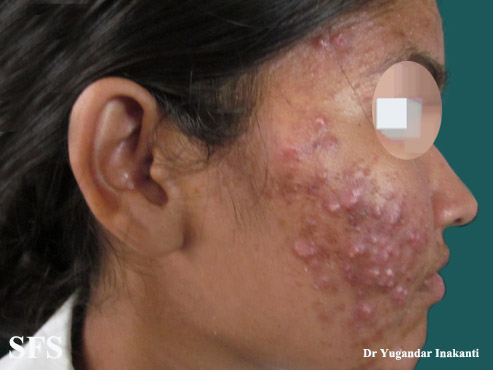

In [18]:
urticaria = glob.glob(images + label_151[2] + "/*")
print(urticaria)
PIL.Image.open(urticaria[1])

In [19]:
batch_size = 32
img_height = 256
img_width = 256

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  working_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 485 files belonging to 3 classes.
Using 388 files for training.


In [21]:
print(train_ds.class_names)

['acne', 'dermatomyositis', 'pediculosis lids']


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  working_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 485 files belonging to 3 classes.
Using 97 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['acne', 'dermatomyositis', 'pediculosis lids']


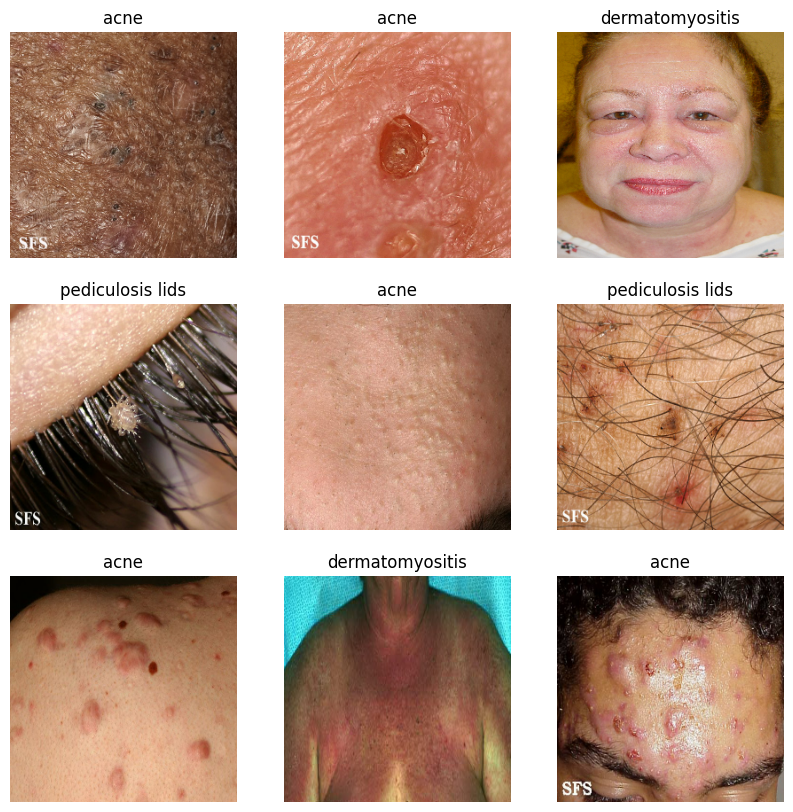

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
#The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [26]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [27]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [28]:
#Just for performance, so dataset doesn't become bottleneck, mostly not needed here
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
data_augmentation_horizontal = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),

  ]
)

data_augmentation_vertical = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("vertical", input_shape= (img_height, img_width, 3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

In [20]:
num_classes = 3

model = tf.keras.Sequential([
  data_augmentation_horizontal,
    data_augmentation_vertical,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(num_classes,activation="softmax", kernel_regularizer= "l2")
])

In [20]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                   

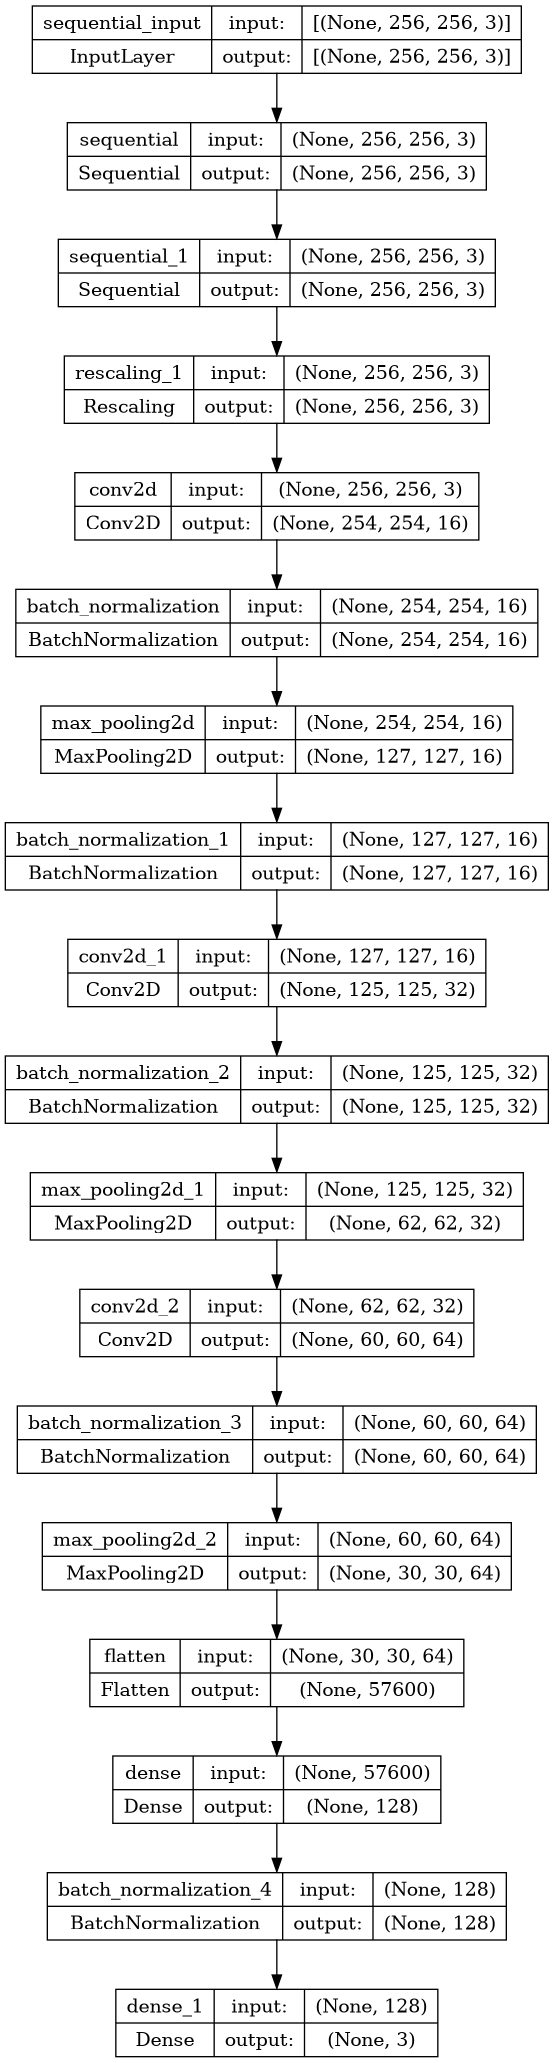

In [21]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(model, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [22]:
# Implement callbacks like EarlyStopping and potentially LearningRateScheduler
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

In [23]:
history  = model.fit(
  train_ds,
  validation_data=val_ds,
  
  epochs=60,
     
)

Epoch 1/60
12/12 [==============================] - 9s 133ms/step - loss: 1.7962 - accuracy: 0.5840 - val_loss: 1.1206 - val_accuracy: 0.4778
Epoch 2/60
12/12 [==============================] - 1s 42ms/step - loss: 0.9455 - accuracy: 0.7135 - val_loss: 1.0657 - val_accuracy: 0.4889
Epoch 3/60
12/12 [==============================] - 1s 42ms/step - loss: 0.6532 - accuracy: 0.7879 - val_loss: 1.0802 - val_accuracy: 0.4667
Epoch 4/60
12/12 [==============================] - 0s 42ms/step - loss: 0.5745 - accuracy: 0.8127 - val_loss: 1.2013 - val_accuracy: 0.4000
Epoch 5/60
12/12 [==============================] - 0s 42ms/step - loss: 0.5038 - accuracy: 0.8209 - val_loss: 1.3901 - val_accuracy: 0.4000
Epoch 6/60
12/12 [==============================] - 0s 42ms/step - loss: 0.4642 - accuracy: 0.8623 - val_loss: 1.8279 - val_accuracy: 0.4000
Epoch 7/60
12/12 [==============================] - 0s 42ms/step - loss: 0.4321 - accuracy: 0.8512 - val_loss: 2.2926 - val_accuracy: 0.4000
Epoch 8/60
1

In [24]:
z

NameError: name 'z' is not defined

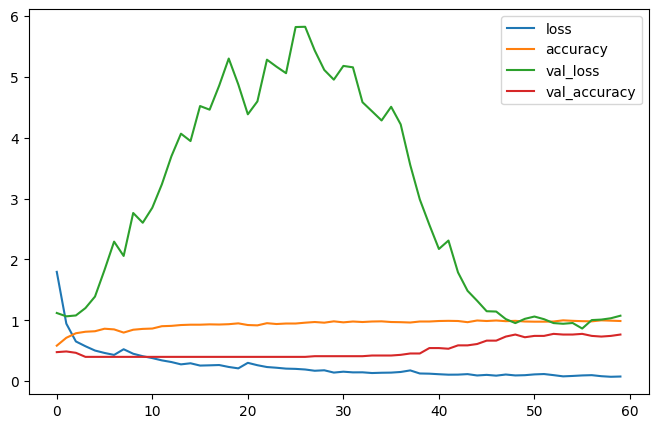

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [26]:
os.mkdir("/kaggle/working/experiment_01_image_augmentation_tf_image_classification")


In [27]:
plt.savefig("/kaggle/working/experiment_01_image_augmentation_tf_image_classification/metrics_chart.png")

<Figure size 640x480 with 0 Axes>

In [29]:
def preprocess_image(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    return resized_image, label

train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)


In [30]:
import tensorflow as tf
from transformers import ViTFeatureExtractor, TFAutoModelForImageClassification

num_classes = 3
image_size = 224  # Standard image size for Vision Transformer

# Initialize the feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

# Load the Vision Transformer model pre-trained on ImageNet-21k
# We will fine-tune this model on your specific dataset
model = TFAutoModelForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=num_classes,  # Number of output classes
    id2label={str(i): f'label_{i}' for i in range(num_classes)},  # Optional: Mapping for id to label
    label2id={f'label_{i}': str(i) for i in range(num_classes)},  # Optional: Mapping for label to id
)

# Compile the model with optimizer, loss, and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Model summary to see the full architecture
model.summary()


/opt/conda/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_vi_t_for_image_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit (TFViTMainLayer)        multiple                  85798656  
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 85800963 (327.30 MB)
Trainable params: 85800963 (327.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
  EarlyStopping(monitor='val_loss', patience=10),  # Stop training when `val_loss` is no longer improving
  ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)  # Save the best model based on `val_loss`
]

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=60,
  verbose=1,
  callbacks=callbacks,
    batch_size= 32,
)


Epoch 1/60


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/transformers/modeling_tf_utils.py", line 1640, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_file1eb_rcv2.py", line 37, in tf__run_call_with_unpacked_inputs
        retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
    File "/tmp/__autograph_generated_filezbu73th7.py", line 17, in tf__call
        outputs = ag__.converted_call(ag__.ld(self).vit, (), dict(pixel_values=ag__.ld(pixel_values), head_mask=ag__.ld(head_mask), output_attentions=ag__.ld(output_attentions), output_hidden_states=ag__.ld(output_hidden_states), interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), return_dict=ag__.ld(return_dict), training=ag__.ld(training)), fscope)
    File "/tmp/__autograph_generated_file1eb_rcv2.py", line 37, in tf__run_call_with_unpacked_inputs
        retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
    File "/tmp/__autograph_generated_file95cj1wek.py", line 24, in tf__call
        embedding_output = ag__.converted_call(ag__.ld(self).embeddings, (), dict(pixel_values=ag__.ld(pixel_values), interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), training=ag__.ld(training)), fscope)
    File "/tmp/__autograph_generated_file9p0lveqw.py", line 12, in tf__call
        embeddings = ag__.converted_call(ag__.ld(self).patch_embeddings, (ag__.ld(pixel_values),), dict(interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), training=ag__.ld(training)), fscope)
    File "/tmp/__autograph_generated_file43vvxzpu.py", line 63, in tf__call
        projection = ag__.converted_call(ag__.ld(self).projection, (ag__.ld(pixel_values),), None, fscope)

    ValueError: Exception encountered when calling layer 'tf_vi_t_for_image_classification' (type TFViTForImageClassification).
    
    in user code:
    
        File "/opt/conda/lib/python3.10/site-packages/transformers/modeling_tf_utils.py", line 735, in run_call_with_unpacked_inputs  *
            return func(self, **unpacked_inputs)
        File "/opt/conda/lib/python3.10/site-packages/transformers/models/vit/modeling_tf_vit.py", line 744, in call  *
            outputs = self.vit(
        File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/tmp/__autograph_generated_file1eb_rcv2.py", line 37, in tf__run_call_with_unpacked_inputs
            retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
        File "/tmp/__autograph_generated_file95cj1wek.py", line 24, in tf__call
            embedding_output = ag__.converted_call(ag__.ld(self).embeddings, (), dict(pixel_values=ag__.ld(pixel_values), interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), training=ag__.ld(training)), fscope)
        File "/tmp/__autograph_generated_file9p0lveqw.py", line 12, in tf__call
            embeddings = ag__.converted_call(ag__.ld(self).patch_embeddings, (ag__.ld(pixel_values),), dict(interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), training=ag__.ld(training)), fscope)
        File "/tmp/__autograph_generated_file43vvxzpu.py", line 63, in tf__call
            projection = ag__.converted_call(ag__.ld(self).projection, (ag__.ld(pixel_values),), None, fscope)
    
        ValueError: Exception encountered when calling layer 'vit' (type TFViTMainLayer).
        
        in user code:
        
            File "/opt/conda/lib/python3.10/site-packages/transformers/modeling_tf_utils.py", line 735, in run_call_with_unpacked_inputs  *
                return func(self, **unpacked_inputs)
            File "/opt/conda/lib/python3.10/site-packages/transformers/models/vit/modeling_tf_vit.py", line 503, in call  *
                embedding_output = self.embeddings(
            File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
            File "/tmp/__autograph_generated_file9p0lveqw.py", line 12, in tf__call
                embeddings = ag__.converted_call(ag__.ld(self).patch_embeddings, (ag__.ld(pixel_values),), dict(interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), training=ag__.ld(training)), fscope)
            File "/tmp/__autograph_generated_file43vvxzpu.py", line 63, in tf__call
                projection = ag__.converted_call(ag__.ld(self).projection, (ag__.ld(pixel_values),), None, fscope)
        
            ValueError: Exception encountered when calling layer 'embeddings' (type TFViTEmbeddings).
            
            in user code:
            
                File "/opt/conda/lib/python3.10/site-packages/transformers/models/vit/modeling_tf_vit.py", line 124, in call  *
                    embeddings = self.patch_embeddings(
                File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
                    raise e.with_traceback(filtered_tb) from None
                File "/tmp/__autograph_generated_file43vvxzpu.py", line 63, in tf__call
                    projection = ag__.converted_call(ag__.ld(self).projection, (ag__.ld(pixel_values),), None, fscope)
            
                ValueError: Exception encountered when calling layer 'patch_embeddings' (type TFViTPatchEmbeddings).
                
                in user code:
                
                    File "/opt/conda/lib/python3.10/site-packages/transformers/models/vit/modeling_tf_vit.py", line 199, in call  *
                        projection = self.projection(pixel_values)
                    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
                        raise e.with_traceback(filtered_tb) from None
                    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
                        raise ValueError(
                
                    ValueError: Input 0 of layer "projection" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 224, 3, 224)
                
                
                Call arguments received by layer 'patch_embeddings' (type TFViTPatchEmbeddings):
                  • pixel_values=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
                  • interpolate_pos_encoding=None
                  • training=True
            
            
            Call arguments received by layer 'embeddings' (type TFViTEmbeddings):
              • pixel_values=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
              • interpolate_pos_encoding=None
              • training=True
        
        
        Call arguments received by layer 'vit' (type TFViTMainLayer):
          • pixel_values=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
          • head_mask=None
          • output_attentions=False
          • output_hidden_states=False
          • interpolate_pos_encoding=None
          • return_dict=True
          • training=True
    
    
    Call arguments received by layer 'tf_vi_t_for_image_classification' (type TFViTForImageClassification):
      • pixel_values=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
      • head_mask=None
      • output_attentions=None
      • output_hidden_states=None
      • interpolate_pos_encoding=None
      • return_dict=None
      • labels=None
      • training=True


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
for images, labels in train_ds.take(1):
    print(images.shape)  # Expecting something like (batch_size, 224, 224, 3)


(32, 224, 224, 3)


In [31]:
import tensorflow as tf
from tensorflow.keras import layers

def create_vit_classifier(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim):
    inputs = layers.Input(shape=input_shape)
    # Create patches
    patches = Patches(patch_size)(inputs)
    
    # Encode patches to a latent space
    encoded_patches = PatchEncoder(num_patches, embedding_dim)(patches)
    
    # Transformer blocks
    for _ in range(num_transformer_blocks):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embedding_dim, dropout=0.1)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x4 = layers.Dense(mlp_dim, activation=tf.nn.gelu)(x3)
        x5 = layers.Dense(embedding_dim)(x4)
        encoded_patches = layers.Add()([x5, x2])
    
    # Create a [batch_size, embedding_dim] tensor
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Classify outputs
    outputs = layers.Dense(num_classes, activation="softmax")(representation)
    
    # Create the Keras model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

# Model configuration
input_shape = (224, 224, 3)  # Input image size
num_classes = 5  # Example number of classes
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (input_shape[0] // patch_size) * (input_shape[1] // patch_size)
num_transformer_blocks = 4  # Number of transformer blocks
embedding_dim = 64  # Dimensionality of the patch encoding and transformer internal embedding
num_heads = 4  # Number of attention heads
mlp_dim = 128  # Dimensionality of the dense layers of the transformer

# Create the ViT model
vit_model = create_vit_classifier(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim)

# Compile the model
vit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
vit_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 patches_1 (Patches)         (None, None, 768)            0         ['input_2[0][0]']             
                                                                                                  
 patch_encoder_1 (PatchEnco  (None, 196, 64)              61760     ['patches_1[0][0]']           
 der)                                                                                             
                                                                                                  
 layer_normalization_9 (Lay  (None, 196, 64)              128       ['patch_encoder_1[0][0]'

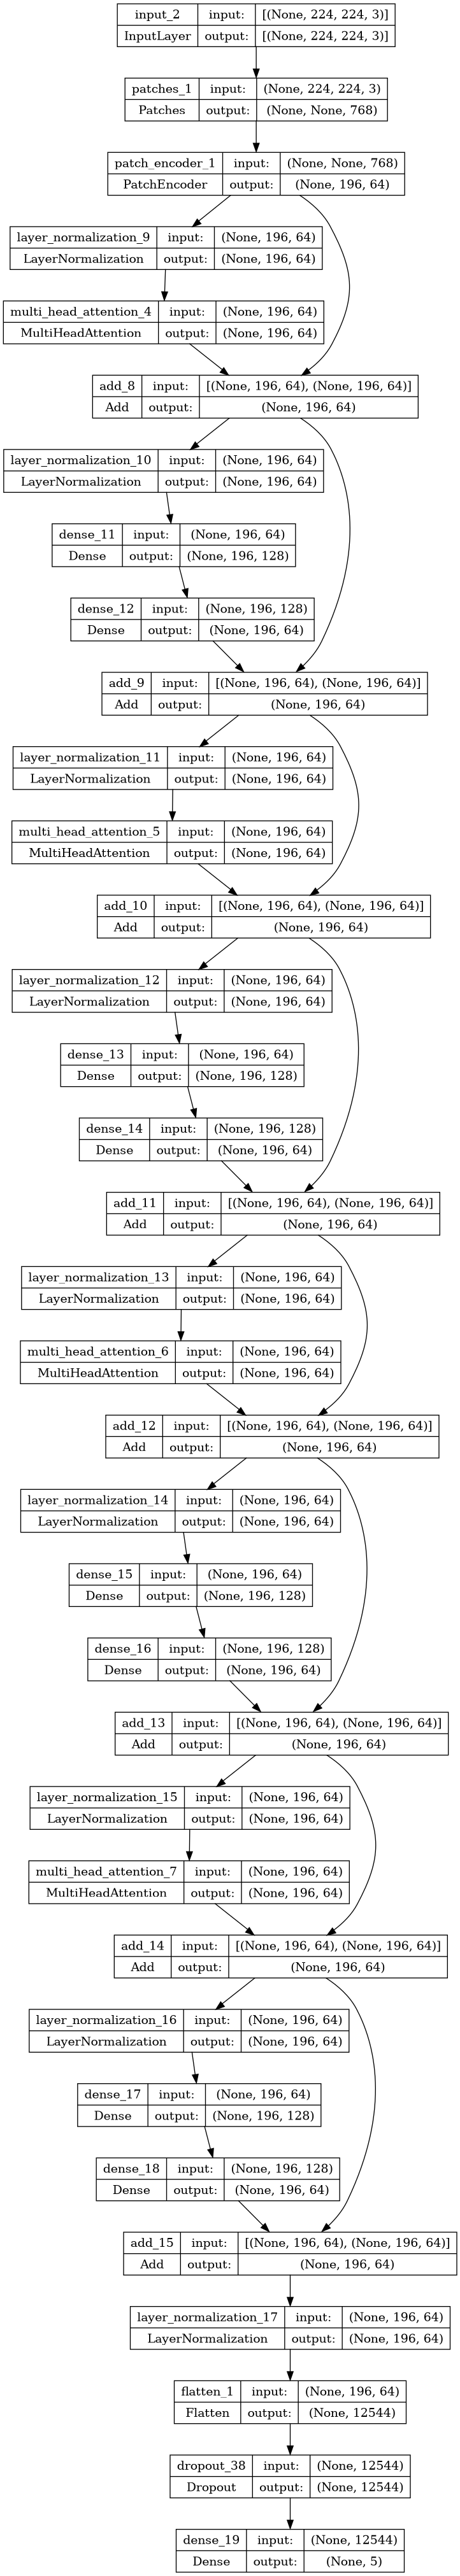

In [32]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(vit_model, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
  EarlyStopping(monitor='val_loss', patience=50),  # Stop training when `val_loss` is no longer improving
  ModelCheckpoint(filepath='model_vit.h5', monitor='val_loss', save_best_only=True)  # Save the best model based on `val_loss`
]

history = vit_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
  verbose=1,
  callbacks=callbacks,
    batch_size= 32,
)


Epoch 1/100
13/13 [==============================] - 17s 141ms/step - loss: 3.1523 - accuracy: 0.3376 - val_loss: 1.9271 - val_accuracy: 0.4124
Epoch 2/100


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 1s 43ms/step - loss: 1.8921 - accuracy: 0.4072 - val_loss: 2.4519 - val_accuracy: 0.3711
Epoch 3/100
13/13 [==============================] - 1s 59ms/step - loss: 2.2271 - accuracy: 0.3222 - val_loss: 1.8967 - val_accuracy: 0.3608
Epoch 4/100
13/13 [==============================] - 1s 57ms/step - loss: 1.4080 - accuracy: 0.4820 - val_loss: 1.0461 - val_accuracy: 0.5773
Epoch 5/100
13/13 [==============================] - 1s 43ms/step - loss: 1.3667 - accuracy: 0.4691 - val_loss: 1.1804 - val_accuracy: 0.5052
Epoch 6/100
13/13 [==============================] - 1s 58ms/step - loss: 1.2570 - accuracy: 0.5103 - val_loss: 0.9269 - val_accuracy: 0.6289
Epoch 7/100
13/13 [==============================] - 1s 43ms/step - loss: 1.1468 - accuracy: 0.5515 - val_loss: 1.2341 - val_accuracy: 0.4536
Epoch 8/100
13/13 [==============================] - 1s 43ms/step - loss: 0.9652 - accuracy: 0.5954 - val_loss: 1.0827 - val_accuracy: 0.6495
Epoch 9/100
13/13 

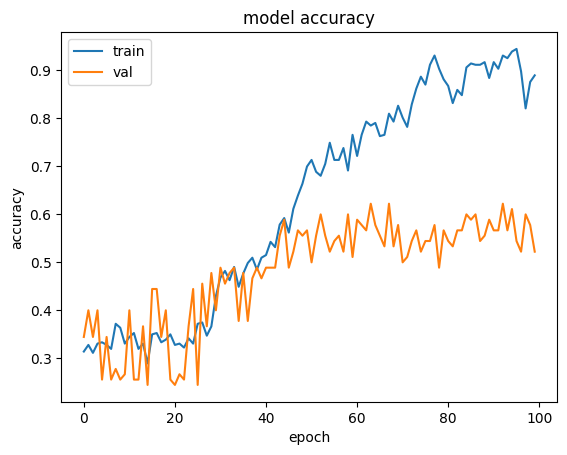

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from transformers import TFAutoModel


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
def create_cnn_model(fine_tune_at=100):
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    model = tf.keras.Model(inputs, x)
    return model


In [5]:
class CombinedCNNModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(CombinedCNNModel, self).__init__()
        self.cnn = create_cnn_model()
        self.dense1 = tf.keras.layers.Dense(1024, activation='relu')  # Example of an additional dense layer
        self.dropout = tf.keras.layers.Dropout(0.5)  # Dropout layer to reduce overfitting
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.cnn(inputs)
        x = self.dense1(x)
        x = self.dropout(x)
        return self.classifier(x)


In [6]:
num_classes = 5  # For example, using CIFAR-10 dataset
model = CombinedCNNModel(num_classes=num_classes)

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


94765736/94765736 [==============================] - 3s 0us/step


In [7]:
model.build((None, 224, 224, 3))  # None allows for a variable batch size
model.summary()


Model: "combined_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 1024)              25694080  
                                                                 
 dense_1 (Dense)             multiple                  1049600   
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  5125      
                                                                 
Total params: 26748805 (102.04 MB)
Trainable params: 22609925 (86.25 MB)
Non-trainable params: 4138880 (15.79 MB)
_________________________________________________________________


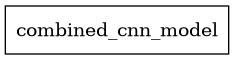

In [8]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(model, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [9]:
history  = model.fit(
  train_ds,
  validation_data=val_ds,
  
  epochs=100,
     
)

NameError: name 'train_ds' is not defined

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [120]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = self.position_embedding(tf.range(start=0, limit=self.num_patches, delta=1))
        encoded = self.projection(patch) + positions
        return encoded

def create_vit_classifier_with_cnn(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim, regularization_factor=0.01, dropout_rate=0.1):
    inputs = layers.Input(shape=input_shape)
    
    # Convolutional preprocessing
    x = layers.Conv2D(64, kernel_size=3, strides=2, padding="same", activation="relu", 
                      kernel_regularizer=l2(regularization_factor))(inputs)
    x = layers.Conv2D(128, kernel_size=3, strides=2, padding="same", activation="relu", 
                      kernel_regularizer=l2(regularization_factor))(x)
    
    # Create patches
    patches = Patches(patch_size)(x)
    num_patches = (input_shape[0] // 4 // patch_size) ** 2
    encoded_patches = PatchEncoder(num_patches, embedding_dim)(patches)
    
    # Transformer blocks with dropout
    for _ in range(num_transformer_blocks):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embedding_dim, dropout=dropout_rate)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x2 = layers.Dropout(dropout_rate)(x2)  # Applying dropout after the first add operation
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x4 = layers.Dense(mlp_dim, activation=tf.nn.gelu, 
                          kernel_regularizer=l2(regularization_factor))(x3)
        x4 = layers.Dropout(dropout_rate)(x4)
        x5 = layers.Dense(embedding_dim, kernel_regularizer=l2(regularization_factor))(x4)
        encoded_patches = layers.Add()([x5, x2])
    
    # Final layers
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)  # Increased dropout in the final representation
    outputs = layers.Dense(num_classes, activation="softmax")(representation)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


# Model configuration
input_shape = (224, 224, 3)
num_classes = 3
patch_size = 16
num_transformer_blocks = 4
embedding_dim = 64
num_heads = 4
mlp_dim = 128

# Now using Adam optimizer with a learning rate scheduler or a chosen learning rate
vit_model_with_cnn = create_vit_classifier_with_cnn(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim)
vit_model_with_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
                           loss='sparse_categorical_crossentropy', metrics=['accuracy'])

vit_model_with_cnn.summary()


Model: "model_26"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_36 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_71 (Conv2D)          (None, 112, 112, 64)         1792      ['input_36[0][0]']            
                                                                                                  
 conv2d_72 (Conv2D)          (None, 56, 56, 128)          73856     ['conv2d_71[0][0]']           
                                                                                                  
 conv2d_73 (Conv2D)          (None, 28, 28, 256)          295168    ['conv2d_72[0][0]']           
                                                                                           

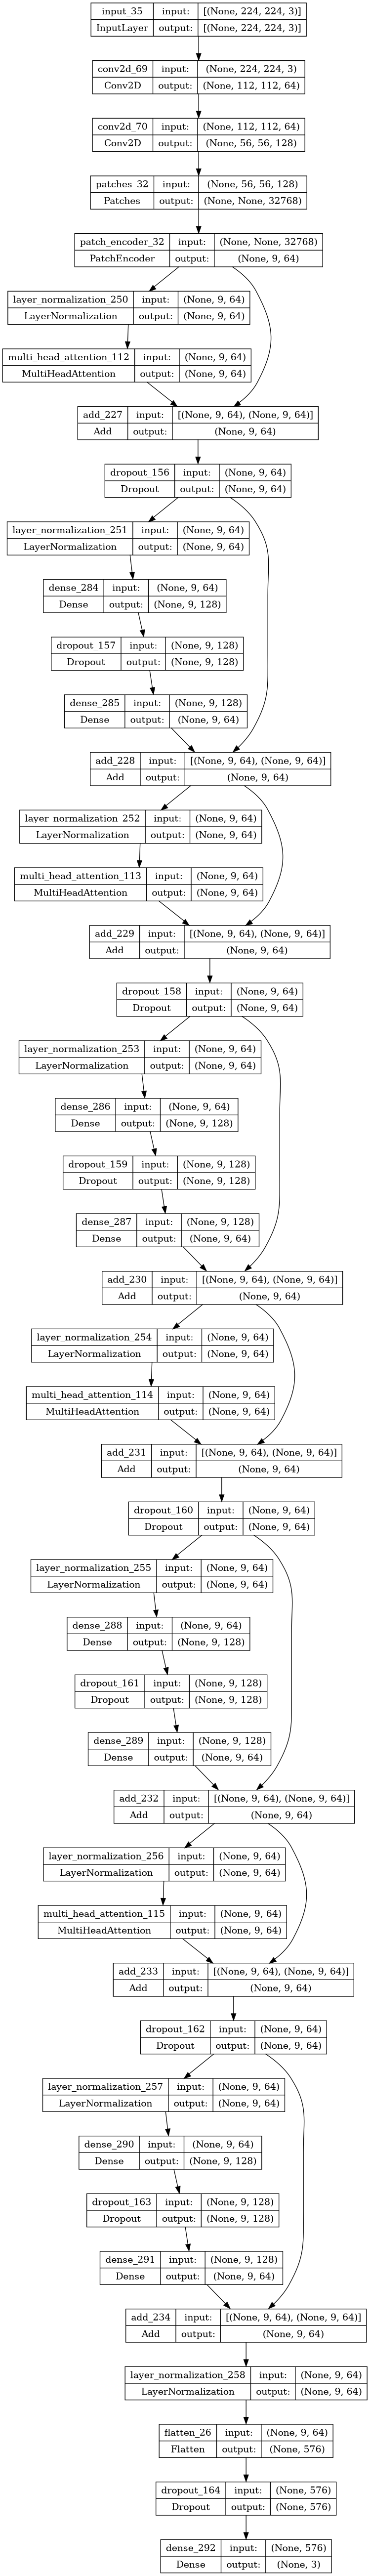

In [118]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(vit_model_with_cnn, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [110]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [105]:
log_dir = './logs'


In [106]:
# tensorboard_callback = tf.keras.callbacks.


In [121]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

callbacks = [
  EarlyStopping(monitor='val_loss', patience=50),  # Stop training when `val_loss` is no longer improving
  ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True),  # Save the best model based on `val_loss`
#     TensorBoard(log_dir=log_dir, histogram_freq=1),

]

history = vit_model_with_cnn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
  verbose=1,
  callbacks=callbacks,
    batch_size= 32,
)


Epoch 1/100
13/13 [==============================] - 17s 142ms/step - loss: 11.6087 - accuracy: 0.3660 - val_loss: 10.2750 - val_accuracy: 0.2784
Epoch 2/100
13/13 [==============================] - 1s 82ms/step - loss: 10.8698 - accuracy: 0.3196 - val_loss: 10.0135 - val_accuracy: 0.3608
Epoch 3/100
13/13 [==============================] - 1s 83ms/step - loss: 10.4463 - accuracy: 0.3608 - val_loss: 9.8208 - val_accuracy: 0.4021
Epoch 4/100
13/13 [==============================] - 1s 84ms/step - loss: 10.1315 - accuracy: 0.3686 - val_loss: 9.4482 - val_accuracy: 0.4948
Epoch 5/100
13/13 [==============================] - 1s 83ms/step - loss: 9.9174 - accuracy: 0.3711 - val_loss: 9.1891 - val_accuracy: 0.4845
Epoch 6/100
13/13 [==============================] - 1s 87ms/step - loss: 9.6796 - accuracy: 0.3634 - val_loss: 9.1169 - val_accuracy: 0.4536
Epoch 7/100
13/13 [==============================] - 1s 90ms/step - loss: 9.2869 - accuracy: 0.4356 - val_loss: 8.8495 - val_accuracy: 0.484

In [52]:
from IPython.display import FileLink
FileLink(r'vit_model_with_cnn_3.h5')

/kaggle/working/vit_model_with_cnn_3.h5

In [165]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Replace 'path_to_your_image.jpg' with the actual file path
image_path = '/kaggle/input/fitzpatrick/CategorizedFitz/urticaria/13062fae27bfe0225afc2fc3ce88c47d.jpg'
image = load_img(image_path, target_size=(224, 224))  # Resize the image
image = img_to_array(image)  # Convert the image to an array
image = np.expand_dims(image, axis=0)  # Add a batch dimension
image = preprocess_input(image)  # Preprocess the image as required by your model


In [166]:
# Assuming `model` is your loaded model
predictions = vit_model_with_cnn.predict(image)


1/1 [==============================] - 0s 23ms/step


In [167]:
predictions

array([[0.87914735, 0.0308496 , 0.09000309]], dtype=float32)

In [168]:
glob.glob("/kaggle/working/working_classes/urticaria/*")

['/kaggle/working/working_classes/urticaria/c27cb73a12dd832b8ad993beaf214f33.jpg',
 '/kaggle/working/working_classes/urticaria/133b4fcc150b7c46904dafc9bf7b37b8.jpg',
 '/kaggle/working/working_classes/urticaria/7e8aee92689229aca18d40ecdb6c3619.jpg',
 '/kaggle/working/working_classes/urticaria/c1a28d89cc6efeb31b3cb82d33ef2c8a.jpg',
 '/kaggle/working/working_classes/urticaria/f0824bbe5e4988f57a12e8675d4756d5.jpg',
 '/kaggle/working/working_classes/urticaria/3c0b7fb55ded4483b67c7a4660342f50.jpg',
 '/kaggle/working/working_classes/urticaria/cc04b0ff2e327ced8cb695ec2d249fc8.jpg',
 '/kaggle/working/working_classes/urticaria/1a9620e330df8bb3345abd67ceccec82.jpg',
 '/kaggle/working/working_classes/urticaria/be2ccd3ecc5ed99e8cf1afadd9eeb17c.jpg',
 '/kaggle/working/working_classes/urticaria/b72ecde37774690b0e8996ff5b352a60.jpg',
 '/kaggle/working/working_classes/urticaria/7bea5460d1e522ef183f4da647da4f8f.jpg',
 '/kaggle/working/working_classes/urticaria/75083d8d3b0d73dcf51f04e4ac128d3f.jpg',
 '/k

In [127]:

# Sort the list in alphanumerical order
sorted_labels = sorted(label_151)

sorted_labels

['dermatomyositis', 'pediculosis lids', 'urticaria']

In [173]:
# Assuming you have a list of class names corresponding to the model's outputs
class_names = sorted_labels  # Update this with your actual class names

# Print probabilities with corresponding class names
for class_name, prediction in zip(class_names, predictions[0]):
    print(f"{class_name}: {prediction*100:.2f}%")


dermatomyositis: 98.05%
pediculosis lids: 0.34%
urticaria: 1.61%


In [174]:
# Get the index of the highest probability
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_index]
predicted_probability = predictions[0][predicted_class_index]

print(f"Predicted class: {predicted_class_name}, Probability: {predicted_probability*100:.2f}%")


Predicted class: dermatomyositis, Probability: 98.05%


In [169]:
#dermatoyomosis
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

#Dermyotois
# Replace 'path_to_your_image.jpg' with the actual file path
image_path = '/kaggle/input/fitzpatrick/CategorizedFitz/dermatomyositis/ee32463c71b6c65adb0469a8732fb48e.jpg'
image = load_img(image_path, target_size=(224, 224))  # Resize the image
image = img_to_array(image)  # Convert the image to an array
image = np.expand_dims(image, axis=0)  # Add a batch dimension
image = preprocess_input(image)  # Preprocess the image as required by your model


In [170]:
# Assuming `model` is your loaded model
predictions = vit_model_with_cnn.predict(image)


1/1 [==============================] - 0s 23ms/step


In [171]:
# Assuming you have a list of class names corresponding to the model's outputs
class_names = sorted_labels  # Update this with your actual class names

# Print probabilities with corresponding class names
for class_name, prediction in zip(class_names, predictions[0]):
    print(f"{class_name}: {prediction*100:.2f}%")


dermatomyositis: 98.05%
pediculosis lids: 0.34%
urticaria: 1.61%


In [172]:
# Get the index of the highest probability
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_index]
predicted_probability = predictions[0][predicted_class_index]

print(f"Predicted class: {predicted_class_name}, Probability: {predicted_probability*100:.2f}%")


Predicted class: dermatomyositis, Probability: 98.05%


In [81]:
#dermatoyomosis
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

#Peducolosis
# Replace 'path_to_your_image.jpg' with the actual file path
image_path = '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/66c29e61739db4535bf5e8f472ea346a.jpg'
image = load_img(image_path, target_size=(224, 224))  # Resize the image
image = img_to_array(image)  # Convert the image to an array
image = np.expand_dims(image, axis=0)  # Add a batch dimension
image = preprocess_input(image)  # Preprocess the image as required by your model


In [82]:
# Assuming `model` is your loaded model
predictions = vit_model_with_cnn.predict(image)


1/1 [==============================] - 0s 23ms/step


In [83]:
# Assuming you have a list of class names corresponding to the model's outputs
class_names = sorted_labels  # Update this with your actual class names

# Print probabilities with corresponding class names
for class_name, prediction in zip(class_names, predictions[0]):
    print(f"{class_name}: {prediction*100:.2f}%")


dermatomyositis: 6.60%
pediculosis lids: 89.11%
urticaria: 4.29%


In [17]:
%load_ext tensorboard
%tensorboard --logdir /kaggle/working/logs/fit/20240330-161342


In [49]:
# Serialize the model architecture to JSON
model_json = vit_model_with_cnn.to_json()

# Write the model JSON to a file
with open("/kaggle/working/vit_model_with_cnn_architecture.json", "w") as json_file:
    json_file.write(model_json)


In [51]:
# Save the entire model to a file (includes architecture, weights, and optimizer state)
vit_model_with_cnn.save("/kaggle/working/vit_model_with_cnn_3.h5")


In [61]:
%tensorboard --logdir /kaggle/working/logs/fit/20240330-161342 --port 6000


In [66]:
%tensorboard --logdir /kaggle/working/logs/fit/20240330-161342

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

In [38]:
tensorboard --logdir logs/fit --port 8080


In [37]:
# Load TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

# Set up the log directory
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Create TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
history = vit_model_with_cnn.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[tensorboard_callback]
)

# Start TensorBoard within the notebook using the same log directory
%tensorboard --logdir logs/fit


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/10
12/12 [==============================] - 3s 149ms/step - loss: 2.2235e-04 - accuracy: 1.0000 - val_loss: 1.5039 - val_accuracy: 0.6000
Epoch 2/10
12/12 [==============================] - 3s 152ms/step - loss: 4.0750e-04 - accuracy: 1.0000 - val_loss: 1.5040 - val_accuracy: 0.6000
Epoch 3/10
12/12 [==============================] - 3s 157ms/step - loss: 3.8713e-04 - accuracy: 1.0000 - val_loss: 1.5084 - val_accuracy: 0.6000
Epoch 4/10
12/12 [==============================] - 3s 156ms/step - loss: 9.0574e-04 - accuracy: 1.0000 - val_loss: 1.5132 - val_accuracy: 0.6000
Epoch 5/10
12/12 [==============================] - 3s 148ms/step - loss: 2.9361e-04 - accuracy: 1.0000 - val_loss: 1.5129 - val_accuracy: 0.6000
Epoch 6/10
12/12 [==============================] - 3s 155ms/step - loss: 2.6694e-04 - accuracy: 1.0000 - val_loss: 1.5140 - val_accuracy: 0.6000
Epoch 7/10
12/12 [================

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

DEBUGGING 


In [21]:
import tensorflow as tf
import numpy as np

# Assuming the Patches class is defined as in your code snippet
class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Create a dummy image tensor (e.g., a single 224x224 RGB image)
dummy_image = tf.random.normal([1, 224, 224, 3])

# Initialize the Patches layer with your desired patch size
patch_size = 16  # Example patch size
patches_layer = Patches(patch_size=patch_size)

# Call the layer with the dummy image
patches = patches_layer(dummy_image)

print("Shape of patches:", patches.shape)


Shape of patches: (1, 196, 768)


In [25]:
# Assuming the PatchEncoder class is defined as in your code snippet
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = tf.keras.layers.Dense(units=projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):

        batch_size = tf.shape(patch)[0]
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        positions = self.position_embedding(positions)  # [num_patches, projection_dim]

        # Debugging: Print shapes
        print("Before expansion, positions shape:", positions.shape)

        # Expand dims to [1, num_patches, projection_dim] and tile to match batch size
        positions = tf.expand_dims(positions, axis=0)  # Add batch dimension
        positions = tf.tile(positions, [batch_size, 1, 1])  # Tile to match `patch`'s batch size

        # Debugging: Print shapes before the addition
        print("Positions shape:", positions.shape)
        print("Patch projection shape:", self.projection(patch).shape)

        encoded = self.projection(patch) + positions
        return encoded



# Assume `patches` is obtained from the previous step
# Calculate the number of patches based on the image and patch sizes
num_patches = ((224 // 4) // patch_size) * ((224 // 4) // patch_size)
projection_dim = 64  # Example projection dimension

# Initialize the PatchEncoder layer
patch_encoder_layer = PatchEncoder(num_patches=num_patches, projection_dim=projection_dim)

# Call the layer with the patches
encoded_patches = patch_encoder_layer(patches)

print("Shape of encoded patches:", encoded_patches.shape)


Before expansion, positions shape: (9, 64)
Positions shape: (1, 9, 64)
Patch projection shape: (1, 196, 64)


InvalidArgumentError: Exception encountered when calling layer 'patch_encoder_5' (type PatchEncoder).

{{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} required broadcastable shapes [Op:AddV2] name: 

Call arguments received by layer 'patch_encoder_5' (type PatchEncoder):
  • patch=tf.Tensor(shape=(1, 196, 768), dtype=float32)

In [51]:
%pip install visualkeras

  Obtaining dependency information for visualkeras from https://files.pythonhosted.org/packages/a5/93/abd375b37add77d58a8c48a506ae39bb77c4380e2507ea444325ff1b9971/visualkeras-0.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/e4/57/59b42e145ff12941c5c63d59dc48369912a9e29d69966ff630e6f0f815ac/aggdraw-1.3.18.post0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 31.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [52]:
import visualkeras

In [56]:
visualkeras.layered_view(vit_model_with_cnn, to_file='/kaggle/working/model.png', type_ignore=[visualkeras.SpacingDummyLayer])

TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [58]:
# Load the extension and start TensorBoard

%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, regularization_factor=0.01):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim, 
                                       kernel_regularizer=l2(regularization_factor))
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        batch_size = tf.shape(patch)[0]
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        positions = self.position_embedding(positions)

        # Expand dims to [1, num_patches, projection_dim] and tile to match batch size
        positions = tf.expand_dims(positions, axis=0)
        positions = tf.tile(positions, [batch_size, 1, 1])

        encoded = self.projection(patch) + positions
        return encoded

def create_vit_classifier_with_cnn(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim):
    inputs = layers.Input(shape=input_shape)
    
    # Convolutional preprocessing
    x = layers.Conv2D(64, kernel_size=3, strides=2, padding="same", activation="relu", 
                  kernel_regularizer=l2(0.01))(inputs)
    x = layers.Conv2D(128, kernel_size=3, strides=2, padding="same", activation="relu", 
                      kernel_regularizer=l2(0.01))(x)


    # Create patches from the output of the CNN
    patches = Patches(patch_size)(x)
    
    # Adjust the number of patches based on the new size after convolutional layers
    size_after_conv = input_shape[0] // 4  # Adjust based on your convolutional layers
    num_patches = (size_after_conv // patch_size) * (size_after_conv // patch_size)
    encoded_patches = PatchEncoder(num_patches, embedding_dim)(patches)
    
    for _ in range(num_transformer_blocks):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embedding_dim, dropout=0.1)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x4 = layers.Dense(mlp_dim, activation=tf.nn.gelu)(x3)
        x5 = layers.Dense(embedding_dim)(x4)
        encoded_patches = layers.Add()([x5, x2])
    
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    outputs = layers.Dense(num_classes, activation="softmax")(representation)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

# Model configuration
input_shape = (224, 224, 3)
num_classes = 3
patch_size = 16
num_transformer_blocks = 4
embedding_dim = 64
num_heads = 4
mlp_dim = 128

# Create the ViT model with convolutional layers
vit_model_with_cnn = create_vit_classifier_with_cnn(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim)

# Compile the model
vit_model_with_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
vit_model_with_cnn.summary()
